In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/raw/insurance.csv')

print(df.head())
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


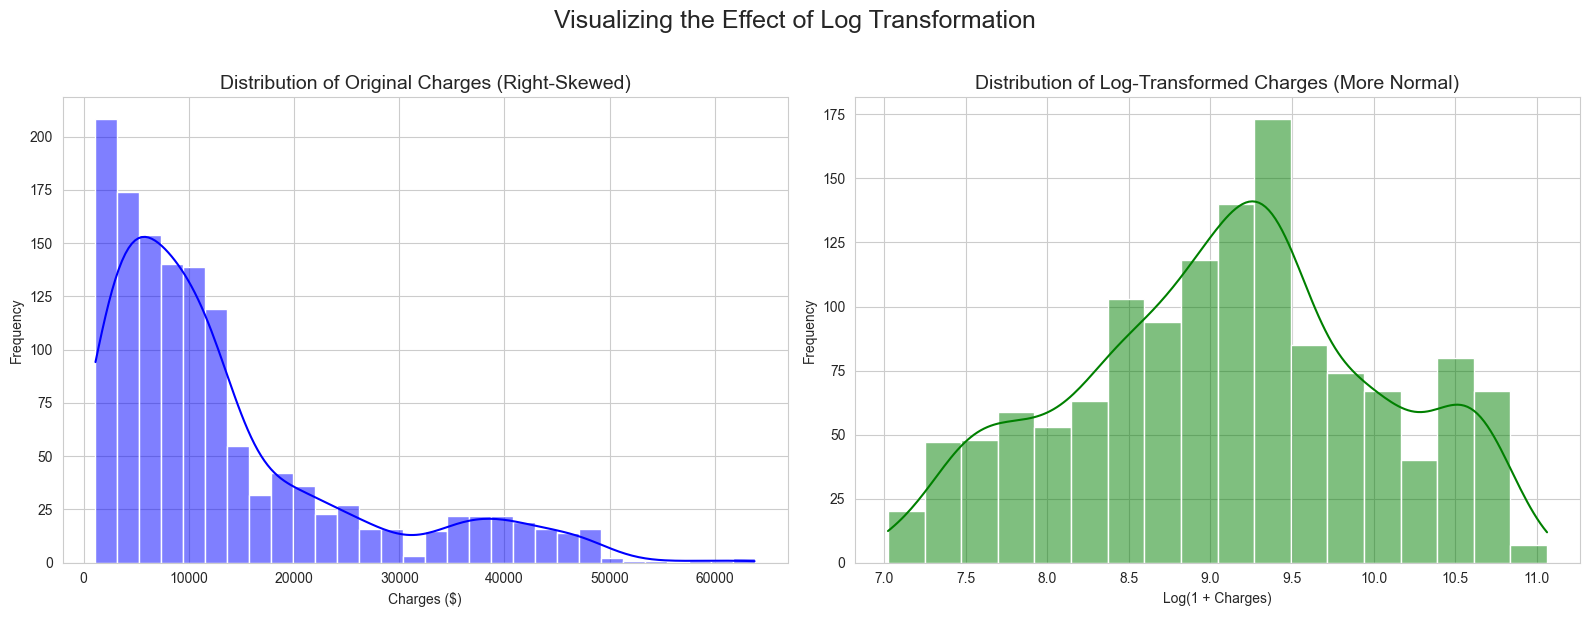

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the raw dataset
df_raw = pd.read_csv('../data/raw/insurance.csv')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style('whitegrid')

# Plot 1: Distribution of Original Charges
sns.histplot(df_raw['charges'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Original Charges (Right-Skewed)', fontsize=14)
axes[0].set_xlabel('Charges ($)')
axes[0].set_ylabel('Frequency')

# Plot 2: Distribution of Log-Transformed Charges
log_charges = np.log1p(df_raw['charges'])
sns.histplot(log_charges, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Log-Transformed Charges (More Normal)', fontsize=14)
axes[1].set_xlabel('Log(1 + Charges)')
axes[1].set_ylabel('Frequency')

plt.suptitle('Visualizing the Effect of Log Transformation', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


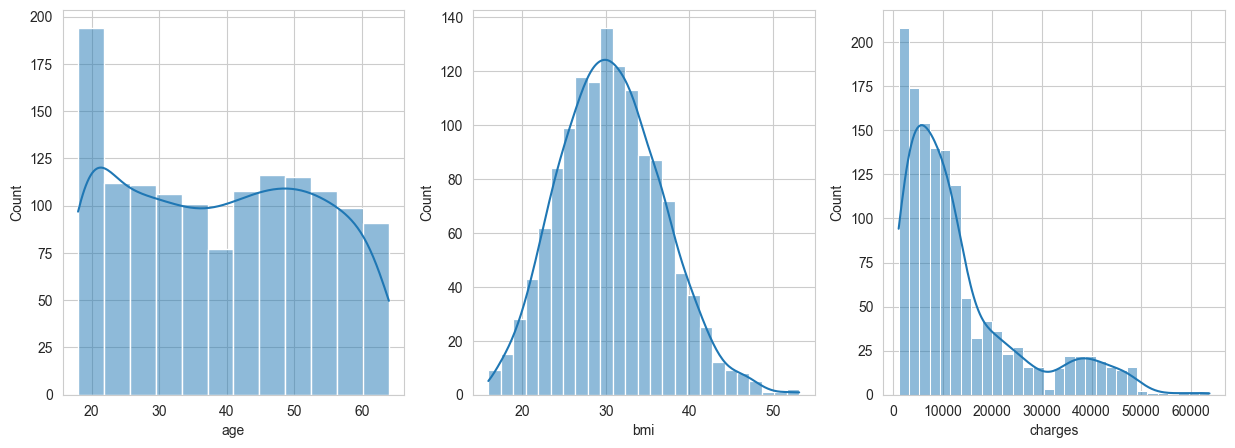

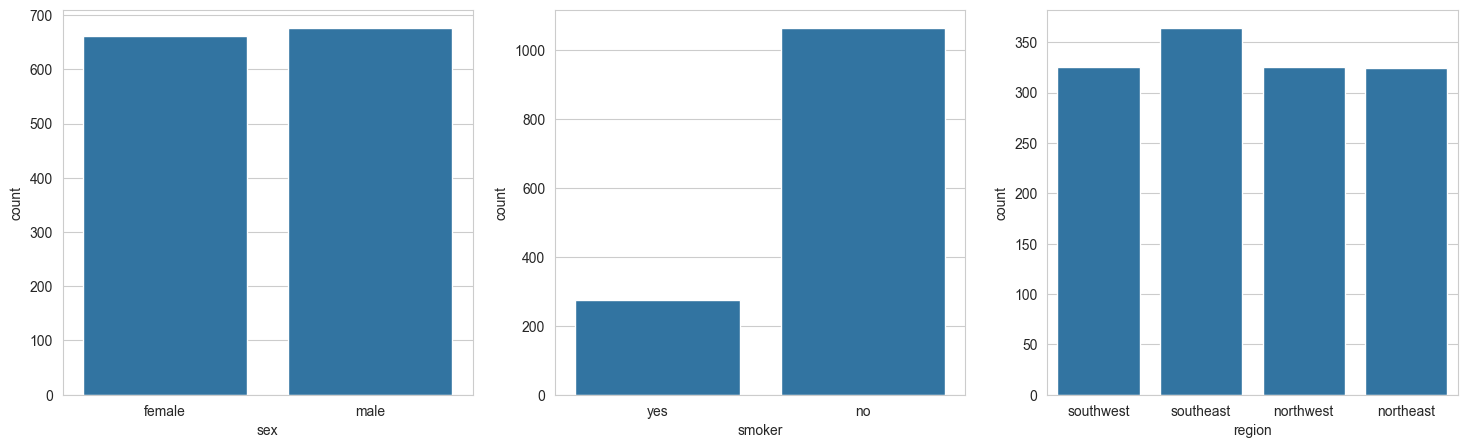

In [2]:
 # Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize distributions of numerical features
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['age'], kde=True, ax=axes[0])
sns.histplot(df['bmi'], kde=True, ax=axes[1])
sns.histplot(df['charges'], kde=True, ax=axes[2])
plt.show()

# Visualize categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='sex', data=df, ax=axes[0])
sns.countplot(x='smoker', data=df, ax=axes[1])
sns.countplot(x='region', data=df, ax=axes[2])
plt.show()

In [3]:
# Apply log transform to charges to reduce skewness
df['log_charges'] = np.log1p(df['charges'])

# Convert categorical features into numerical ones using one-hot encoding
df_processed = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Drop original columns that are no longer needed
df_processed = df_processed.drop(['charges'], axis=1)

print(df_processed.head())

# Save the processed data
df_processed.to_csv('../data/processed/insurance_processed.csv', index=False)

   age     bmi  children  log_charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0     9.734236     False        True             False   
1   18  33.770         1     7.453882      True       False             False   
2   28  33.000         3     8.400763      True       False             False   
3   33  22.705         0     9.998137      True       False              True   
4   32  28.880         0     8.260455      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  
